In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# logistic regression
from sklearn.linear_model import LogisticRegression

# import svm
from sklearn import svm
from sklearn.svm import SVC

# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikasukani/loan-eligible-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chrys\.cache\kagglehub\datasets\vikasukani\loan-eligible-dataset\versions\1


In [40]:
ls {path}

 Volume in drive C has no label.
 Volume Serial Number is D687-9345

 Directory of C:\Users\chrys\.cache\kagglehub\datasets\vikasukani\loan-eligible-dataset\versions\1

20/10/2025  19.16    <DIR>          .
20/10/2025  19.16    <DIR>          ..
20/10/2025  19.16            21.957 loan-test.csv
20/10/2025  19.16            38.013 loan-train.csv
               2 File(s)         59.970 bytes
               2 Dir(s)  111.007.727.616 bytes free


In [41]:
df_train = pd.read_csv(path + "/loan-train.csv")
df_test = pd.read_csv(path + "/loan-test.csv")

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [44]:
df_train = df_train.drop('Loan_ID', axis=1)
df_test = df_test.drop('Loan_ID', axis=1)

In [45]:
# fill missing values in categorical columns with mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

C:\Users\chrys\AppData\Local\Temp\ipykernel_23612\1462017996.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
C:\Users\chrys\AppData\Local\Temp\ipykernel_23612\1462017996.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [46]:
# fill missing values in numerical columns with mean
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    df_train[col].fillna(df_train[col].mean(), inplace=True)
    df_test[col].fillna(df_test[col].mean(), inplace=True)

C:\Users\chrys\AppData\Local\Temp\ipykernel_23612\256705762.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mean(), inplace=True)
C:\Users\chrys\AppData\Local\Temp\ipykernel_23612\256705762.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [47]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
# Define categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 
                      'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Status']

# Apply one-hot encoding
df_train_encoded = pd.get_dummies(
    df_train, 
    columns=categorical_columns,
    drop_first=True
)

categorical_columns = ['Gender', 'Married', 'Education', 
                      'Self_Employed', 'Property_Area', 'Dependents']

df_test_encoded = pd.get_dummies(
    df_test, 
    columns=categorical_columns,
    drop_first=True
)


KeyError: "['Loan_Status'] not in index"

In [ ]:
df_train_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,False,False,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,False,True,False,True,False,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,True,False,False,False,True


In [ ]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    bool   
 6   Married_Yes              614 non-null    bool   
 7   Education_Not Graduate   614 non-null    bool   
 8   Self_Employed_Yes        614 non-null    bool   
 9   Property_Area_Semiurban  614 non-null    bool   
 10  Property_Area_Urban      614 non-null    bool   
 11  Dependents_1             614 non-null    bool   
 12  Dependents_2             614 non-null    bool   
 13  Dependents_3+            614 non-null    bool   
 14  Loan_Status_Y            6

In [ ]:
df_train_cleaned = df_train_encoded.copy()
df_test_cleaned = df_test_encoded.copy()

In [ ]:
df_train_cleaned['TotalIncome'] = df_train_cleaned['ApplicantIncome'] + df_train_cleaned['CoapplicantIncome']
df_train_cleaned.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

df_test_cleaned['TotalIncome'] = df_test_cleaned['ApplicantIncome'] + df_test_cleaned['CoapplicantIncome']
df_test_cleaned.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [ ]:
df_train_cleaned['LoanAmount_log'] = np.log(df_train_cleaned['LoanAmount'])
df_train_cleaned.drop('LoanAmount', axis=1, inplace=True)

df_test_cleaned['LoanAmount_log'] = np.log(df_test_cleaned['LoanAmount'])
df_test_cleaned.drop('LoanAmount', axis=1, inplace=True)

In [ ]:
# scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['TotalIncome', 'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History']

df_train_cleaned[numerical_columns] = scaler.fit_transform(df_train_cleaned[numerical_columns])
df_test_cleaned[numerical_columns] = scaler.fit_transform(df_test_cleaned[numerical_columns])


In [ ]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_Amount_Term         614 non-null    float64
 1   Credit_History           614 non-null    float64
 2   Gender_Male              614 non-null    bool   
 3   Married_Yes              614 non-null    bool   
 4   Education_Not Graduate   614 non-null    bool   
 5   Self_Employed_Yes        614 non-null    bool   
 6   Property_Area_Semiurban  614 non-null    bool   
 7   Property_Area_Urban      614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Loan_Status_Y            614 non-null    bool   
 12  TotalIncome              614 non-null    float64
 13  LoanAmount_log           614 non-null    float64
dtypes: bool(10), float64(4)
me

In [ ]:
df_test_cleaned.info()

NameError: name 'df_test_cleaned' is not defined

In [ ]:
# train test split
X = df_train_cleaned.drop('Loan_Status_Y', axis=1)
y = df_train_cleaned['Loan_Status_Y']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_Amount_Term         614 non-null    float64
 1   Credit_History           614 non-null    float64
 2   Gender_Male              614 non-null    bool   
 3   Married_Yes              614 non-null    bool   
 4   Education_Not Graduate   614 non-null    bool   
 5   Self_Employed_Yes        614 non-null    bool   
 6   Property_Area_Semiurban  614 non-null    bool   
 7   Property_Area_Urban      614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  TotalIncome              614 non-null    float64
 12  LoanAmount_log           614 non-null    float64
dtypes: bool(9), float64(4)
memory usage: 24.7 KB


In [ ]:
# logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# make predictions
y_pred = logreg.predict(X)
print("Logistic Regression Training Accuracy:", accuracy_score(y, y_pred))

Logistic Regression Training Accuracy: 0.8078175895765473


In [ ]:
# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Confusion Matrix:
 [[ 83 109]
 [  9 413]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.43      0.58       192
        True       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



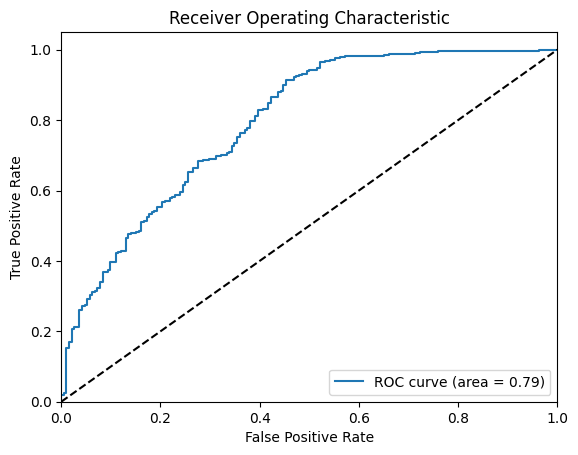

In [ ]:
# ROC curve
y_prob = logreg.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_Amount_Term         367 non-null    float64
 1   Credit_History           367 non-null    float64
 2   Gender_Male              367 non-null    bool   
 3   Married_Yes              367 non-null    bool   
 4   Dependents_1             367 non-null    bool   
 5   Dependents_2             367 non-null    bool   
 6   Dependents_3+            367 non-null    bool   
 7   Education_Not Graduate   367 non-null    bool   
 8   Self_Employed_Yes        367 non-null    bool   
 9   Property_Area_Semiurban  367 non-null    bool   
 10  Property_Area_Urban      367 non-null    bool   
 11  TotalIncome              367 non-null    float64
 12  LoanAmount_log           367 non-null    float64
dtypes: bool(9), float64(4)
memory usage: 14.8 KB


In [ ]:
df_test_logreg = df_test_cleaned.copy()

# predict the test set
y_test_pred = logreg.predict(df_test_logreg)

# combine predictions into df_test_logreg
df_test_logreg['Loan_Status_Predicted'] = y_test_pred
df_test_logreg.head()

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
# grid search for svc
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# svc model
svc = SVC()
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')
grid.fit(X, y)
svc_model = grid.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.

In [ ]:
# make predictions
y_svc_pred = svc_model.predict(X)
print("SVC Training Accuracy:", accuracy_score(y, y_svc_pred))

SVC Training Accuracy: 0.8094462540716613


In [ ]:
# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_svc_pred))
print("Classification Report:\n", classification_report(y, y_svc_pred))

Confusion Matrix:
 [[ 82 110]
 [  7 415]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.43      0.58       192
        True       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



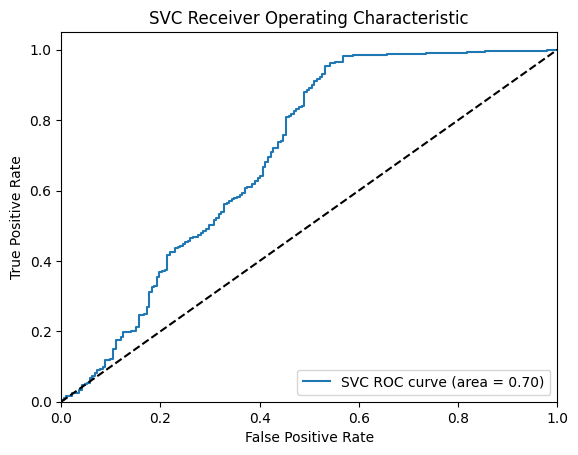

In [ ]:
# ROC curve for SVC
y_svc_prob = svc_model.decision_function(X)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y, y_svc_prob)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.figure()
plt.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = {:.2f})'.format(roc_auc_svc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_test_svc = df_test_cleaned.copy()

# predict the test set
y_test_pred = svc_model.predict(df_test_svc)

# combine predictions into df_test_svc
df_test_svc['Loan_Status_Predicted'] = y_test_pred
df_test_svc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Predicted
0,0.226382,-0.643891,-0.449565,0.264392,0.435087,True,True,False,False,False,True,False,False,False,True
1,-0.326480,-0.011908,-0.181092,0.264392,0.435087,True,True,False,False,False,True,True,False,False,True
2,0.075830,0.114489,1.194835,0.264392,0.435087,True,True,False,False,False,True,False,True,False,True
4,-0.284660,-0.643891,-0.986512,0.264392,0.435087,True,False,True,False,False,True,False,False,False,True
5,-0.516970,0.797873,0.255178,0.264392,0.435087,True,True,True,True,False,True,False,False,False,True


In [ ]:
# decision tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# predict with decision tree
y_dt_pred = dt_model.predict(X)
print("Decision Tree Training Accuracy:", accuracy_score(y, y_dt_pred))

Decision Tree Training Accuracy: 0.8306188925081434


In [ ]:
# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_dt_pred))
print("Classification Report:\n", classification_report(y, y_dt_pred))

Confusion Matrix:
 [[ 96  96]
 [  8 414]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.50      0.65       192
        True       0.81      0.98      0.89       422

    accuracy                           0.83       614
   macro avg       0.87      0.74      0.77       614
weighted avg       0.85      0.83      0.81       614



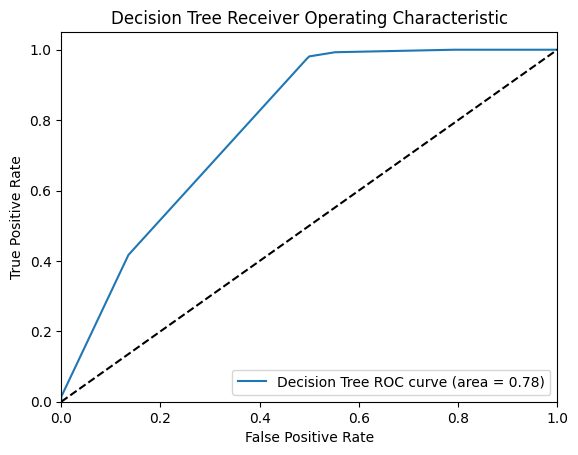

In [ ]:
# roc curve for decision tree
y_dt_prob = dt_model.predict_proba(X)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y, y_dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_test_dt = df_test_cleaned.copy()

# predict the test set
y_test_pred = dt_model.predict(df_test_dt)

# combine predictions into df_test_dt
df_test_dt['Loan_Status_Predicted'] = y_test_pred
df_test_dt.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Predicted
0,0.226382,-0.643891,-0.449565,0.264392,0.435087,True,True,False,False,False,True,False,False,False,True
1,-0.326480,-0.011908,-0.181092,0.264392,0.435087,True,True,False,False,False,True,True,False,False,True
2,0.075830,0.114489,1.194835,0.264392,0.435087,True,True,False,False,False,True,False,True,False,True
4,-0.284660,-0.643891,-0.986512,0.264392,0.435087,True,False,True,False,False,True,False,False,False,True
5,-0.516970,0.797873,0.255178,0.264392,0.435087,True,True,True,True,False,True,False,False,False,True
